# Prédiction des mêmes chansons

Import des librairies utiles

In [1]:
import pandas as pd
import psycopg2
import util
import numpy as np

# Connexion à la base de données locale
conn = psycopg2.connect(host="localhost",
                        database="NOPLP",
                        user="postgres",
                        password="Objectifcentrale2019!")
cur = conn.cursor()

In [2]:
dateSimule = input("Entrer la date au format 'yyyy-MM-dd' : ")

Chargement des données dans un dataframe

In [3]:
df = pd.read_sql_query('SELECT titre, artiste, "année",	nbpassages,	nb_mots, (SELECT AVG(laps) FROM public."LapsMCDP"(titre,' + dateSimule + ')) AS MCDPmoy, (SELECT laps FROM public."LapsMCDP"(titre,' + dateSimule + ') LIMIT 1 ) AS MCDP, (SELECT AVG(laps) FROM public."LapsMCMCDP"(titre,' + dateSimule + ')) AS MCMCDPmoy, (SELECT laps FROM public."LapsMCMCDP"(titre,' + dateSimule + ') LIMIT 1 ) AS MCMCDP, public."DeltaDate"(titre, ' + dateSimule + ',' + dateSimule + '), public."DeltaDateMC"(titre, ' + dateSimule + ',' + dateSimule + ') FROM public."MêmesChansons"',con=conn)
df

,titre,artiste,année,nbpassages,nb_mots,mcdpmoy,mcdp,mcmcdpmoy,mcmcdp,DeltaDate,DeltaDateMC
0,Siffler sur la colline,Dassin Joe,1968.0,2,NaN,42.5,42.0,137.0,137.0,60.0,258
1,Donne-moi le temps,Jenifer,2002.0,3,NaN,86.0,126.0,358.0,126.0,231.0,5
2,La madrague,Bardot Brigitte,1962.0,1,NaN,61.0,61.0,NaN,NaN,6.0,74
3,C'est écrit,Cabrel Francis,1989.0,3,NaN,119.5,107.0,325.0,210.0,183.0,76
4,Les planètes,M. Pokora,2019.0,2,296.0,47.5,43.0,628.0,628.0,99.0,56
...,...,...,...,...,...,...,...,...,...,...,...
404,Les copains d'abord,Brassens Georges,1964.0,2,NaN,54.5,34.0,507.0,507.0,3.0,82
405,Libertine,Farmer Mylène,1986.0,2,NaN,108.0,79.0,175.0,175.0,73.0,416
406,Belinda,François Claude,1972.0,2,NaN,70.0,82.0,538.0,538.0,224.0,142
407,Au soleil,Jenifer,2002.0,2,NaN,68.0,42.0,42.0,42.0,15.0,64


Histogramme des écarts même chanson dernier passage moyens

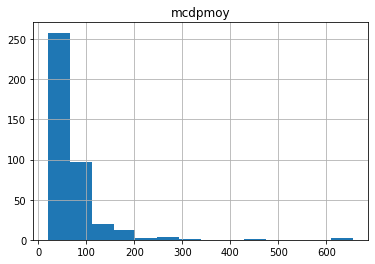

In [4]:
histo = df.hist(column='mcdpmoy',bins=14)

Histogramme des écarts même chanson dernier passage moyens

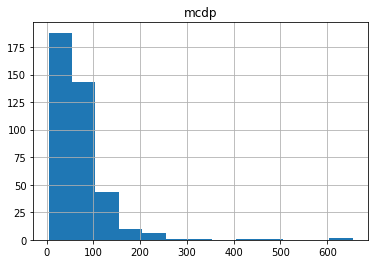

In [5]:
histo = df.hist(column='mcdp',bins=13)

Histogramme des écarts même chanson dernier passage même chanson moyens

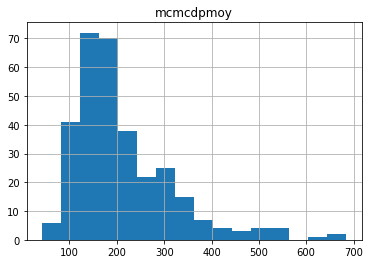

In [6]:
histo = df.hist(column='mcmcdpmoy',bins=16)

Histogramme des derniers écarts même chanson dernier passage même chanson

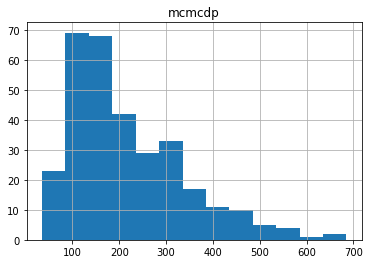

In [7]:
histo = df.hist(column='mcmcdp',bins=13)

Calcul des coefficients

In [8]:
histoMCDPmoy = util.histo(df['mcdpmoy'], 14)
valeursHistoMCDPmoy = util.getHistoValues(histoMCDPmoy)
histoMCDP = util.histo(df['mcdp'], 13)
valeursHistoMCDP = util.getHistoValues(histoMCDP)
histoMCMCDPmoy = util.histo(df['mcmcdpmoy'], 16)
valeursHistoMCMCDPmoy = util.getHistoValues(histoMCMCDPmoy)
histoMCMCDP = util.histo(df['mcmcdp'], 13)
valeursHistoMCMCDP = util.getHistoValues(histoMCMCDP)

In [9]:
taille = df.shape[0]
nb_classes = len(valeursHistoMCDPmoy['classes'])
taille_ech = sum(valeursHistoMCDPmoy['hauteurs'])
df['f'] = np.nan

for i in range(taille):
    classe = 0
    while df['DeltaDate'][i] > valeursHistoMCDPmoy['classes'][classe] and classe < nb_classes-1:
        classe += 1
    df['f'][i] = valeursHistoMCDPmoy['hauteurs'][classe-1]/taille_ech

df

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,titre,artiste,année,nbpassages,nb_mots,mcdpmoy,mcdp,mcmcdpmoy,mcmcdp,DeltaDate,DeltaDateMC,f
0,Siffler sur la colline,Dassin Joe,1968.0,2,NaN,42.5,42.0,137.0,137.0,60.0,258,0.662592
1,Donne-moi le temps,Jenifer,2002.0,3,NaN,86.0,126.0,358.0,126.0,231.0,5,0.004890
2,La madrague,Bardot Brigitte,1962.0,1,NaN,61.0,61.0,NaN,NaN,6.0,74,0.004890
3,C'est écrit,Cabrel Francis,1989.0,3,NaN,119.5,107.0,325.0,210.0,183.0,76,0.029340
4,Les planètes,M. Pokora,2019.0,2,296.0,47.5,43.0,628.0,628.0,99.0,56,0.237164
...,...,...,...,...,...,...,...,...,...,...,...,...
404,Les copains d'abord,Brassens Georges,1964.0,2,NaN,54.5,34.0,507.0,507.0,3.0,82,0.004890
405,Libertine,Farmer Mylène,1986.0,2,NaN,108.0,79.0,175.0,175.0,73.0,416,0.237164
406,Belinda,François Claude,1972.0,2,NaN,70.0,82.0,538.0,538.0,224.0,142,0.004890
407,Au soleil,Jenifer,2002.0,2,NaN,68.0,42.0,42.0,42.0,15.0,64,0.004890


In [10]:
taille = df.shape[0]
nb_classes = len(valeursHistoMCDP['classes'])
taille_ech = sum(valeursHistoMCDP['hauteurs'])
df['g'] = np.nan

for i in range(taille):
    classe = 0
    while df['DeltaDate'][i] > valeursHistoMCDP['classes'][classe] and classe < nb_classes-1:
        classe += 1
    df['g'][i] = valeursHistoMCDP['hauteurs'][classe-1]/taille_ech

df

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,titre,artiste,année,nbpassages,nb_mots,mcdpmoy,mcdp,mcmcdpmoy,mcmcdp,DeltaDate,DeltaDateMC,f,g
0,Siffler sur la colline,Dassin Joe,1968.0,2,NaN,42.5,42.0,137.0,137.0,60.0,258,0.662592,0.349633
1,Donne-moi le temps,Jenifer,2002.0,3,NaN,86.0,126.0,358.0,126.0,231.0,5,0.004890,0.014670
2,La madrague,Bardot Brigitte,1962.0,1,NaN,61.0,61.0,NaN,NaN,6.0,74,0.004890,0.491443
3,C'est écrit,Cabrel Francis,1989.0,3,NaN,119.5,107.0,325.0,210.0,183.0,76,0.029340,0.024450
4,Les planètes,M. Pokora,2019.0,2,296.0,47.5,43.0,628.0,628.0,99.0,56,0.237164,0.349633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,Les copains d'abord,Brassens Georges,1964.0,2,NaN,54.5,34.0,507.0,507.0,3.0,82,0.004890,0.004890
405,Libertine,Farmer Mylène,1986.0,2,NaN,108.0,79.0,175.0,175.0,73.0,416,0.237164,0.349633
406,Belinda,François Claude,1972.0,2,NaN,70.0,82.0,538.0,538.0,224.0,142,0.004890,0.014670
407,Au soleil,Jenifer,2002.0,2,NaN,68.0,42.0,42.0,42.0,15.0,64,0.004890,0.491443


In [11]:
taille = df.shape[0]
nb_classes = len(valeursHistoMCMCDPmoy['classes'])
taille_ech = sum(valeursHistoMCMCDPmoy['hauteurs'])
df['h'] = np.nan

for i in range(taille):
    classe = 0
    while df['DeltaDateMC'][i] > valeursHistoMCMCDPmoy['classes'][classe] and classe < nb_classes-1:
        classe += 1
    df['h'][i] = valeursHistoMCMCDPmoy['hauteurs'][classe-1]/taille_ech

df

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,titre,artiste,année,nbpassages,nb_mots,mcdpmoy,mcdp,mcmcdpmoy,mcmcdp,DeltaDate,DeltaDateMC,f,g,h
0,Siffler sur la colline,Dassin Joe,1968.0,2,NaN,42.5,42.0,137.0,137.0,60.0,258,0.662592,0.349633,0.053790
1,Donne-moi le temps,Jenifer,2002.0,3,NaN,86.0,126.0,358.0,126.0,231.0,5,0.004890,0.014670,0.004890
2,La madrague,Bardot Brigitte,1962.0,1,NaN,61.0,61.0,NaN,NaN,6.0,74,0.004890,0.491443,0.246944
3,C'est écrit,Cabrel Francis,1989.0,3,NaN,119.5,107.0,325.0,210.0,183.0,76,0.029340,0.024450,0.246944
4,Les planètes,M. Pokora,2019.0,2,296.0,47.5,43.0,628.0,628.0,99.0,56,0.237164,0.349633,0.246944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,Les copains d'abord,Brassens Georges,1964.0,2,NaN,54.5,34.0,507.0,507.0,3.0,82,0.004890,0.004890,0.246944
405,Libertine,Farmer Mylène,1986.0,2,NaN,108.0,79.0,175.0,175.0,73.0,416,0.237164,0.349633,0.009780
406,Belinda,François Claude,1972.0,2,NaN,70.0,82.0,538.0,538.0,224.0,142,0.004890,0.014670,0.176039
407,Au soleil,Jenifer,2002.0,2,NaN,68.0,42.0,42.0,42.0,15.0,64,0.004890,0.491443,0.246944


In [12]:
taille = df.shape[0]
nb_classes = len(valeursHistoMCMCDP['classes'])
taille_ech = sum(valeursHistoMCMCDP['hauteurs'])
df['i'] = np.nan

for i in range(taille):
    classe = 0
    while df['DeltaDateMC'][i] > valeursHistoMCMCDP['classes'][classe] and classe < nb_classes-1:
        classe += 1
    df['i'][i] = valeursHistoMCMCDP['hauteurs'][classe-1]/taille_ech

df

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,titre,artiste,année,nbpassages,nb_mots,mcdpmoy,mcdp,mcmcdpmoy,mcmcdp,DeltaDate,DeltaDateMC,f,g,h,i
0,Siffler sur la colline,Dassin Joe,1968.0,2,NaN,42.5,42.0,137.0,137.0,60.0,258,0.662592,0.349633,0.053790,0.066015
1,Donne-moi le temps,Jenifer,2002.0,3,NaN,86.0,126.0,358.0,126.0,231.0,5,0.004890,0.014670,0.004890,0.004890
2,La madrague,Bardot Brigitte,1962.0,1,NaN,61.0,61.0,NaN,NaN,6.0,74,0.004890,0.491443,0.246944,0.295844
3,C'est écrit,Cabrel Francis,1989.0,3,NaN,119.5,107.0,325.0,210.0,183.0,76,0.029340,0.024450,0.246944,0.295844
4,Les planètes,M. Pokora,2019.0,2,296.0,47.5,43.0,628.0,628.0,99.0,56,0.237164,0.349633,0.246944,0.295844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,Les copains d'abord,Brassens Georges,1964.0,2,NaN,54.5,34.0,507.0,507.0,3.0,82,0.004890,0.004890,0.246944,0.295844
405,Libertine,Farmer Mylène,1986.0,2,NaN,108.0,79.0,175.0,175.0,73.0,416,0.237164,0.349633,0.009780,0.029340
406,Belinda,François Claude,1972.0,2,NaN,70.0,82.0,538.0,538.0,224.0,142,0.004890,0.014670,0.176039,0.168704
407,Au soleil,Jenifer,2002.0,2,NaN,68.0,42.0,42.0,42.0,15.0,64,0.004890,0.491443,0.246944,0.295844


In [13]:
df['score'] = df['f']*df['g']*df['h']*df['i']*10000
df

,titre,artiste,année,nbpassages,nb_mots,mcdpmoy,mcdp,mcmcdpmoy,mcmcdp,DeltaDate,DeltaDateMC,f,g,h,i,score
0,Siffler sur la colline,Dassin Joe,1968.0,2,NaN,42.5,42.0,137.0,137.0,60.0,258,0.662592,0.349633,0.053790,0.066015,8.226186
1,Donne-moi le temps,Jenifer,2002.0,3,NaN,86.0,126.0,358.0,126.0,231.0,5,0.004890,0.014670,0.004890,0.004890,0.000017
2,La madrague,Bardot Brigitte,1962.0,1,NaN,61.0,61.0,NaN,NaN,6.0,74,0.004890,0.491443,0.246944,0.295844,1.755657
3,C'est écrit,Cabrel Francis,1989.0,3,NaN,119.5,107.0,325.0,210.0,183.0,76,0.029340,0.024450,0.246944,0.295844,0.524077
4,Les planètes,M. Pokora,2019.0,2,296.0,47.5,43.0,628.0,628.0,99.0,56,0.237164,0.349633,0.246944,0.295844,60.578886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,Les copains d'abord,Brassens Georges,1964.0,2,NaN,54.5,34.0,507.0,507.0,3.0,82,0.004890,0.004890,0.246944,0.295844,0.017469
405,Libertine,Farmer Mylène,1986.0,2,NaN,108.0,79.0,175.0,175.0,73.0,416,0.237164,0.349633,0.009780,0.029340,0.237934
406,Belinda,François Claude,1972.0,2,NaN,70.0,82.0,538.0,538.0,224.0,142,0.004890,0.014670,0.176039,0.168704,0.021304
407,Au soleil,Jenifer,2002.0,2,NaN,68.0,42.0,42.0,42.0,15.0,64,0.004890,0.491443,0.246944,0.295844,1.755657


In [14]:
df = df.sort_values(by='score', ascending=False)
df.to_csv('test.csv', sep=";", encoding='utf8')
# np.where(df['titre'] == 'Ça fait mal')[0][0]
